In [1]:
# IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

import random
import time

In [2]:
# Data Check
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
# Data preprocessing
df = df.drop(columns=['Unnamed: 0'], axis=1)
for i in df.columns:
    print(i,"unique value: ", df[i].unique())

Age unique value:  [31 34 28 25 33 26 32 29 35 30 27]
Employment Type unique value:  ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot unique value:  ['Yes' 'No']
AnnualIncome unique value:  [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
FamilyMembers unique value:  [6 7 4 3 8 9 5 2]
ChronicDiseases unique value:  [1 0]
FrequentFlyer unique value:  ['No' 'Yes']
EverTravelledAbroad unique value:  ['No' 'Yes']
TravelInsurance unique value:  [0 1]


In [4]:
#Q3-1. 단변량 통계 계산
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro

col_1 = [] 
col_2 = [] 
col_3 = [] 
col_4 = [] 
col_5 = [] 
col_6 = [] 

index = ['Age', 'AnnualIncome', 'FamilyMembers']
for col in index:
  test_stat, p_value = stats.shapiro(df[col])
  col_1.append(df[col].mean())
  col_2.append(df[col].std())
  col_3.append(kurtosis(df[col]))
  col_4.append(skew(df[col]))
  col_5.append(test_stat)
  col_6.append(p_value)


columns = {"평균":col_1, "표준편차":col_2, "첨도":col_3, "왜도":col_4, "Shapiro 통계량":col_5, "Shapiro P-value":col_6}     
df_stat = pd.DataFrame(columns, index=index)

In [5]:
df_stat

,평균,표준편차,첨도,왜도,Shapiro 통계량,Shapiro P-value
Age,29.650226,2.913308,-1.102284,0.239444,0.927164,4.971090e-30
AnnualIncome,932762.959235,376855.684748,-1.014087,0.078358,0.965131,1.678087e-21
FamilyMembers,4.752894,1.609650,-0.090694,0.560773,0.938048,5.010313e-28


In [6]:
#Q3-2. Box Plot 도시
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

#범주형 변수 변환, OrdinalEncoder 사용
ordinal = df.select_dtypes('object').columns
encoder = OrdinalEncoder()
df[ordinal]= encoder.fit_transform(df[ordinal])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   float64
 2   GraduateOrNot        1987 non-null   float64
 3   AnnualIncome         1987 non-null   int64  
 4   FamilyMembers        1987 non-null   int64  
 5   ChronicDiseases      1987 non-null   int64  
 6   FrequentFlyer        1987 non-null   float64
 7   EverTravelledAbroad  1987 non-null   float64
 8   TravelInsurance      1987 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 139.8 KB


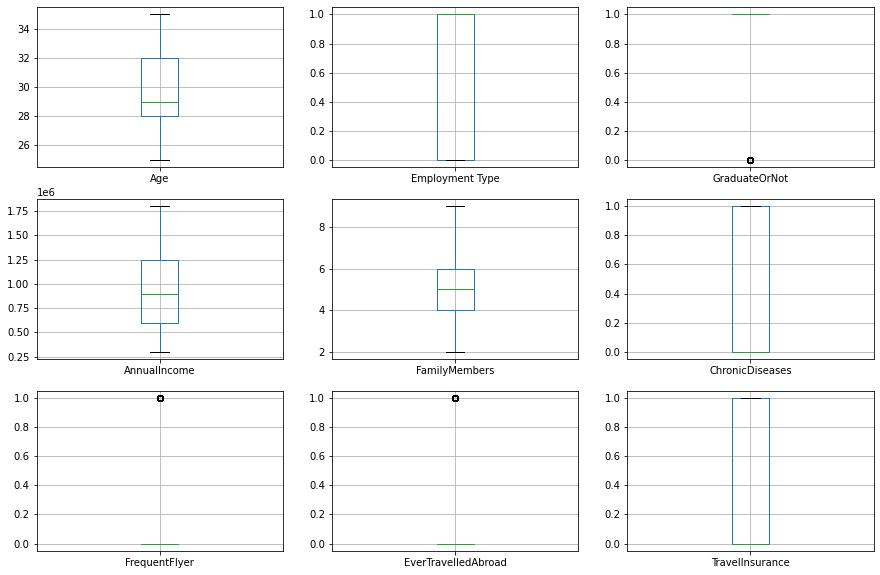

In [7]:
column = ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

def boxplot(df, cols):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    axs = axs.flatten()
    
    for i, col in enumerate(cols):
        ax = axs[i]
        df.boxplot(column=col, ax=ax)
    
    for ax in axs[len(cols):]:
        ax.remove()
    plt.show()
  
boxplot(df, column)

In [8]:
#Q4-1.
column = ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
    
for col in column:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  bound=1.5*iqr
    
  index1=df[df[col] > q3+bound].index
  index2=df[df[col] < q1-bound].index 
  print(col)
  print('Upper bound보다 큰 값의 개수:    ', len(index1))
  print('Lower bound보다 작은 값의 개수:  ', len(index2))
  print('')

Age
Upper bound보다 큰 값의 개수:     0
Lower bound보다 작은 값의 개수:   0

Employment Type
Upper bound보다 큰 값의 개수:     0
Lower bound보다 작은 값의 개수:   0

GraduateOrNot
Upper bound보다 큰 값의 개수:     0
Lower bound보다 작은 값의 개수:   295

AnnualIncome
Upper bound보다 큰 값의 개수:     0
Lower bound보다 작은 값의 개수:   0

FamilyMembers
Upper bound보다 큰 값의 개수:     0
Lower bound보다 작은 값의 개수:   0

ChronicDiseases
Upper bound보다 큰 값의 개수:     0
Lower bound보다 작은 값의 개수:   0

FrequentFlyer
Upper bound보다 큰 값의 개수:     417
Lower bound보다 작은 값의 개수:   0

EverTravelledAbroad
Upper bound보다 큰 값의 개수:     380
Lower bound보다 작은 값의 개수:   0

TravelInsurance
Upper bound보다 큰 값의 개수:     0
Lower bound보다 작은 값의 개수:   0



In [9]:
# HISTOGRAM의 경우 초기에 참고용으로 빼놓았기에, 히스토그램 코드는 하단에 위치함

In [10]:
#Q4-3. 이상치 제거
df = df[(df['AnnualIncome'] != 1650000) & (df['AnnualIncome'] != 1800000) & (df['AnnualIncome'] != 1550000)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1976 non-null   int64  
 1   Employment Type      1976 non-null   float64
 2   GraduateOrNot        1976 non-null   float64
 3   AnnualIncome         1976 non-null   int64  
 4   FamilyMembers        1976 non-null   int64  
 5   ChronicDiseases      1976 non-null   int64  
 6   FrequentFlyer        1976 non-null   float64
 7   EverTravelledAbroad  1976 non-null   float64
 8   TravelInsurance      1976 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 154.4 KB


In [11]:
#결측치 확인
df.isnull().sum().sort_values(ascending=False)

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [12]:
## 평가용
df_1 = df.copy()

<Figure size 864x576 with 0 Axes>

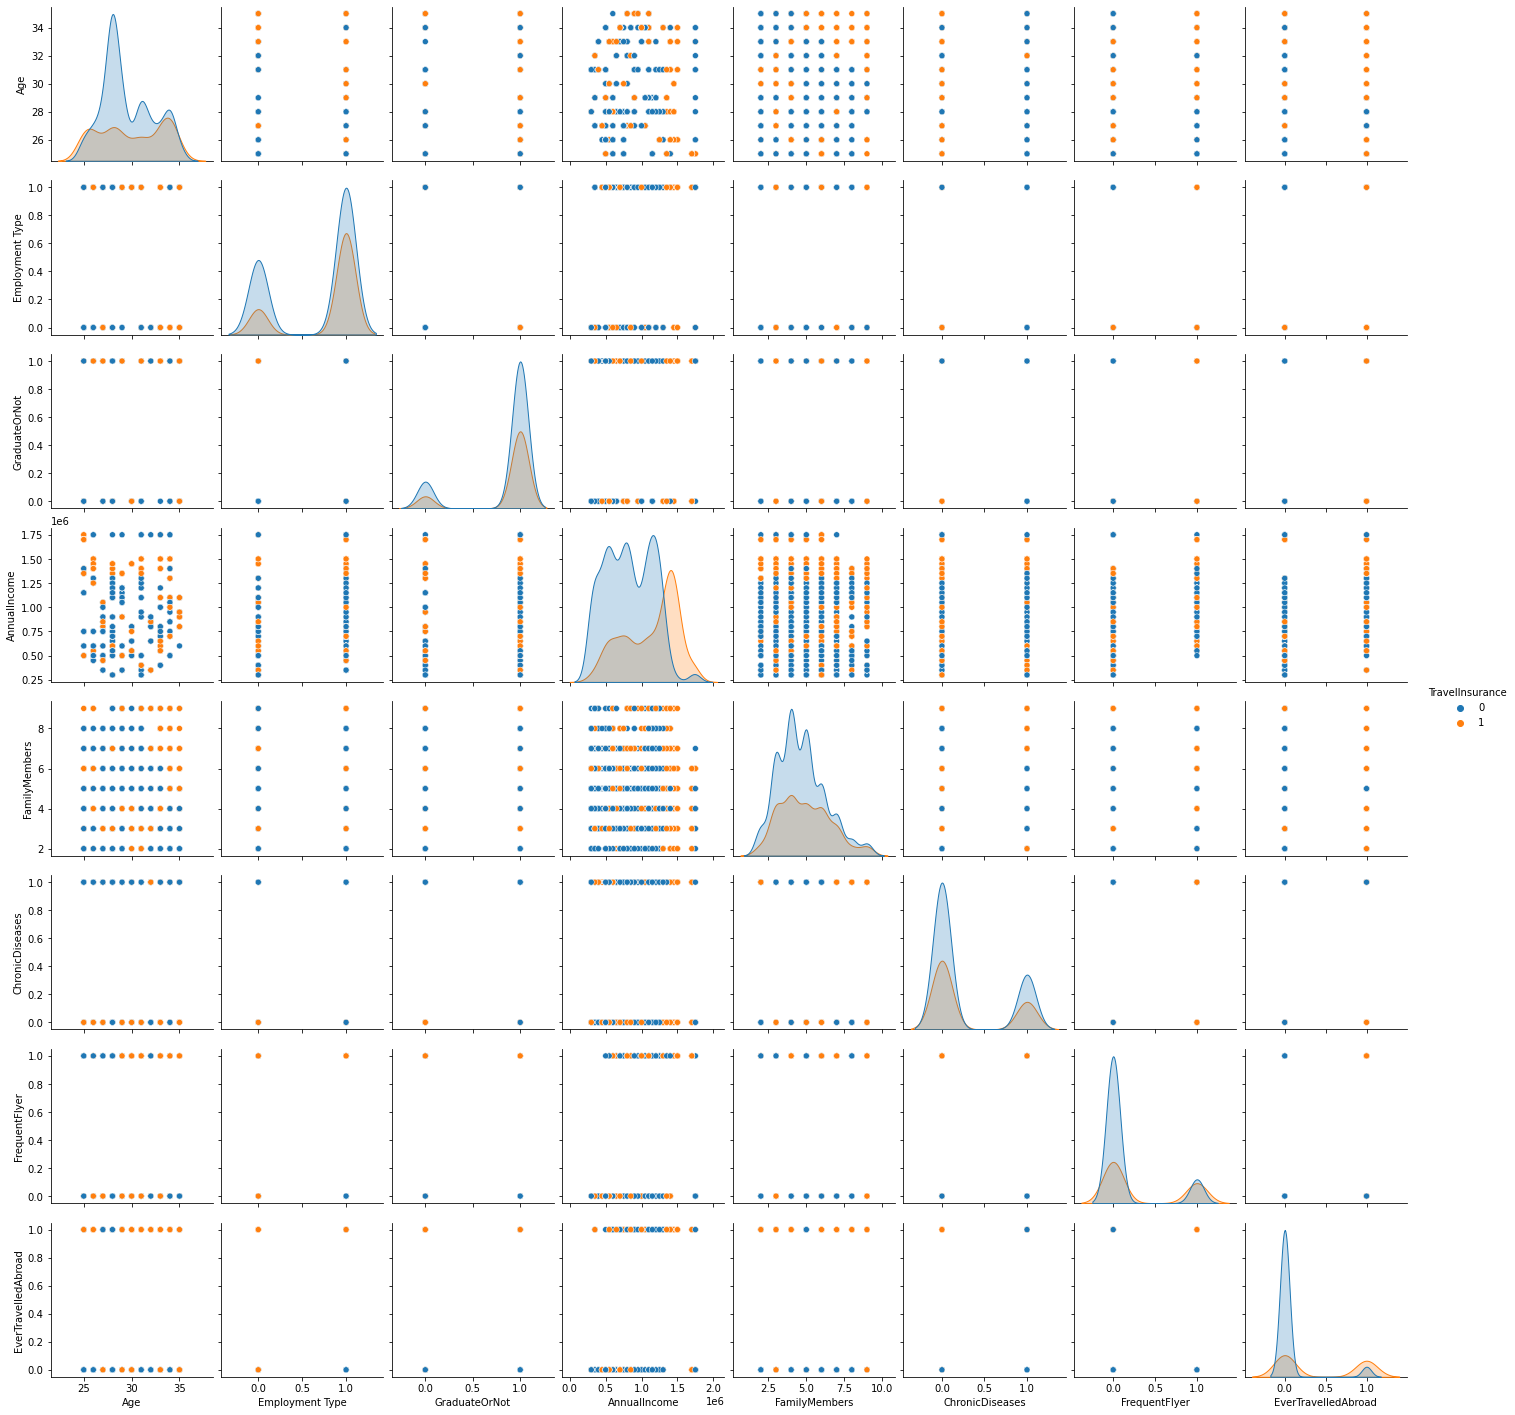

In [13]:
#Q5-1. Scatter plot
plt.figure(figsize=(12, 8))
sns.pairplot(data=df_1, hue="TravelInsurance")

<AxesSubplot:>

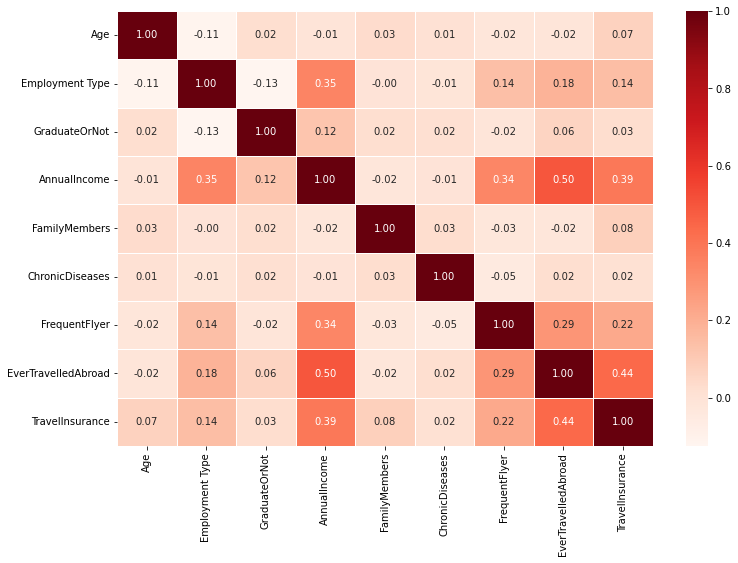

In [14]:
#Q5-2. correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')

In [15]:
#Q6.
#모델 평가 함수
  
def evaluate(X, y):
  # 결과값 저장을 위한 빈 리스트 생성
  train_acc_scores = []
  train_bcr_scores = []
  train_f1_scores = []
  train_cm_scores = []
  test_acc_scores = []
  test_bcr_scores = []
  test_f1_scores = []
  test_cm_scores = []

  # Set the significance level
  alpha = 0.05
  # Set the number of experiments
  n = 100

  for i in range(n):
      # seed를 random하게 설정
      np.random.seed(np.random.randint(1000))
      
      # 데이터 분리
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=i)

      # 데이터 정규화
      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)
      
      # 로지스틱 회귀 모델 생성 및 학습
      model = LogisticRegression()
      start_time = time.time()
      model.fit(X_train, y_train)

      # 학습 데이터를 사용하여 예측 및 평가
      y_train_pred = model.predict(X_train)
      train_acc = accuracy_score(y_train, y_train_pred)
      train_bcr = balanced_accuracy_score(y_train, y_train_pred)
      train_f1 = f1_score(y_train, y_train_pred)

      # 테스트 데이터를 사용하여 예측 및 평가
      y_test_pred = model.predict(X_test)
      test_acc = accuracy_score(y_test, y_test_pred)
      test_bcr = balanced_accuracy_score(y_test, y_test_pred)
      test_f1 = f1_score(y_test, y_test_pred)
      
      # 결과값 저장
      train_acc_scores.append(train_acc)
      train_bcr_scores.append(train_bcr)
      train_f1_scores.append(train_f1)
      
      test_acc_scores.append(test_acc)
      test_bcr_scores.append(test_bcr)
      test_f1_scores.append(test_f1)

  # Calculate the t-value for the given significance level and degrees of freedom
  t_value = t.ppf(1-alpha/2, n-1)

  # 학습 데이터 평균값 및 신뢰구간 계산
  print('Train) Simple Accuracy:', [np.round(np.mean(train_acc_scores), 2), np.round(t_value*np.std(train_acc_scores), 2)])
  print('Train) Balanced Correction Rate:', [np.round(np.mean(train_bcr_scores), 2), np.round(t_value*np.std(train_bcr_scores), 2)])
  print('Train) F1-Measure:', [np.round(np.mean(train_f1_scores), 2), np.round(t_value*np.std(train_f1_scores), 2)])
  print('Train) Confusion Matrix:\n:', confusion_matrix(y_train, y_train_pred)) #Confusion Matrix는 마지막 시행만 출력
  print('')

  # 테스트 데이터 평균값 및 신뢰구간 계산
  print('Test) Simple Accuracy:', [np.round(np.mean(test_acc_scores), 2), np.round(t_value*np.std(test_acc_scores), 2)])
  print('Test) Balanced Correction Rate:', [np.round(np.mean(test_bcr_scores), 2), np.round(t_value*np.std(test_bcr_scores), 2)])
  print('Test) F1-Measure:', [np.round(np.mean(test_f1_scores), 2), np.round(t_value*np.std(test_f1_scores), 2)])
  print('Test) Confusion Matrix:\n:', confusion_matrix(y_test, y_test_pred))

In [16]:
x = df_1.drop(columns=['TravelInsurance'], axis=1) 
y = df_1['TravelInsurance']

# train/test 데이터 분리
#x = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = sm.Logit(y_train, X_train)
result = model.fit(method='newton')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.565893
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df Model:                            7
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.1312
Time:                        22:42:11   Log-Likelihood:                -782.63
converged:                       True   LL-Null:                       -900.83
Covariance Type:            nonrobust   LLR p-value:                 2.161e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1911      0.062      3.063      0.002       0.069       0.313
x2             0.0053      0.

In [17]:
#Q6-3.
evaluate(X = df_1.drop(columns=['TravelInsurance'], axis=1), y = df_1['TravelInsurance'])

Train) Simple Accuracy: [0.77, 0.01]
Train) Balanced Correction Rate: [0.7, 0.02]
Train) F1-Measure: [0.59, 0.03]
Train) Confusion Matrix:
: [[832  62]
 [260 229]]

Test) Simple Accuracy: [0.76, 0.03]
Test) Balanced Correction Rate: [0.7, 0.03]
Test) F1-Measure: [0.58, 0.06]
Test) Confusion Matrix:
: [[355  28]
 [122  88]]


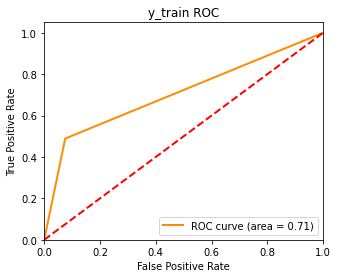

In [18]:
#Q6-4.
from sklearn.metrics import roc_curve, auc

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_train ROC')
plt.legend(loc="lower right")
plt.show()

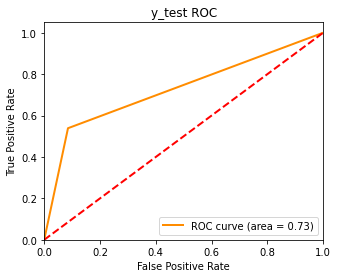

In [19]:
from sklearn.metrics import roc_curve, auc

y_test_pred = model.predict(X_test)


# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_test ROC')
plt.legend(loc="lower right")
plt.show()

In [20]:
#Q7-1.
#VIF 함수
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(df):
  vif = pd.DataFrame()
  vif['VIF Factor'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['Features'] = df.columns
  vif = vif.sort_values("VIF Factor").reset_index(drop=True)
  return vif

vif(df_1)


,VIF Factor,Features
0,1.386970,ChronicDiseases
1,1.469365,FrequentFlyer
2,1.847312,EverTravelledAbroad
3,2.039302,TravelInsurance
4,3.951996,Employment Type
5,6.910327,GraduateOrNot
6,9.289720,FamilyMembers
7,11.465874,AnnualIncome
8,18.886750,Age


In [21]:
#Q7-1. 신규 모델 생성
X = df_1.drop(columns=['TravelInsurance', 'AnnualIncome'], axis=1) 
y = df_1['TravelInsurance']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = sm.Logit(y_train, X_train)
result = model.fit(method='newton')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.584038
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1376
Method:                           MLE   Df Model:                            6
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.1034
Time:                        22:42:22   Log-Likelihood:                -807.72
converged:                       True   LL-Null:                       -900.83
Covariance Type:            nonrobust   LLR p-value:                 1.622e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1931      0.062      3.140      0.002       0.073       0.314
x2             0.1582      0.

In [22]:
#Q7-1. 신규 모델 생성(AGE 변수 제거)
X = df_1.drop(columns=['TravelInsurance', 'AnnualIncome', 'Age'], axis=1) 
y = df_1['TravelInsurance']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = sm.Logit(y_train, X_train)
result = model.fit(method='newton')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.587623
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                 0.09785
Time:                        22:42:22   Log-Likelihood:                -812.68
converged:                       True   LL-Null:                       -900.83
Covariance Type:            nonrobust   LLR p-value:                 3.301e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1371      0.060      2.273      0.023       0.019       0.255
x2             0.0151      0.

In [23]:
#Q7-2. Confusion Matrix
X = df_1.drop(columns=['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'Age', 'TravelInsurance'], axis=1) 
y = df_1['TravelInsurance']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = sm.Logit(y_train, X_train)
result = model.fit(method='newton')
print(result.summary())

evaluate(X = df_1.drop(columns=['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'Age', 'TravelInsurance'], axis=1), y = df_1['TravelInsurance'])

Optimization terminated successfully.
         Current function value: 0.569696
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1379
Method:                           MLE   Df Model:                            3
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.1254
Time:                        22:42:22   Log-Likelihood:                -787.89
converged:                       True   LL-Null:                       -900.83
Covariance Type:            nonrobust   LLR p-value:                 1.073e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5165      0.071      7.263      0.000       0.377       0.656
x2             0.2821      0.

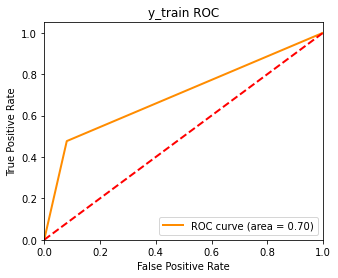

In [24]:
#Q7-3. AUROC
from sklearn.metrics import roc_curve, auc

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_train ROC')
plt.legend(loc="lower right")
plt.show()

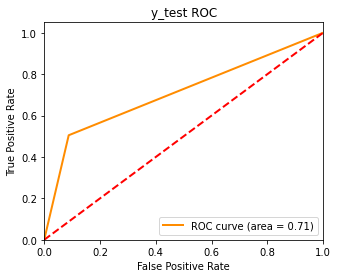

In [25]:
from sklearn.metrics import roc_curve, auc

y_test_pred = model.predict(X_test)


# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_test ROC')
plt.legend(loc="lower right")
plt.show()

In [26]:
#Q8
# 데이터 로드
X = df_1.drop(columns=['TravelInsurance'], axis=1) 
y = df_1['TravelInsurance']

#
import time
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

train_times= [ ]

for _ in range(100):
#Forward Selection
    X = df_1.drop(columns=['TravelInsurance'], axis=1)
    y = df_1['TravelInsurance']
    
    ## train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)
    
    # forward selection based on auroc
    variables = X_train.columns[:-2].tolist() # list of descriptive variables
    selected_variables = [] # selected variables
    sl_enter = 0.05
    
    sv_per_step = [] # Variables selected for each step
    auc = [] # modified coefficient of determination for each step
    steps = [] # steps
    step = 0
    
    start_time = time.time()
    prev_auc = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) # p-value of variable
        
        # Rotate the existing variables and new variables one by one
        # Fit a logistic regression model and calculate auroc
        for col in remainder:
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y_train, X).fit(disp=0)
            pval[col] = roc_auc_score(y_train, model.predict(X))
        
        min_pval = pval.max()
        if min_pval > sl_enter: # Include if the maximum auroc is greater than the criterion
            selected_variables.append(pval.idxmax())
            step += 1
            steps.append(step)
            roc_auc = roc_auc_score(y_train, model.predict(sm.add_constant(X_train[selected_variables])))
            auc.append(roc_auc)
            sv_per_step.append(selected_variables.copy())
            if roc_auc - prev_auc < 0.05:
                break
            prev_auc = roc_auc
        else:
            break
    
    train_time = time.time() - start_time
    train_times.append(train_time)
print('Train) 학습에 소요된 시간:', np.mean(train_times), np.var(train_times))
print('Selected variables:', selected_variables)

Train) 학습에 소요된 시간: 0.28226173400878907 0.02682449019377201
Selected variables: ['AnnualIncome', 'FamilyMembers', 'Age']


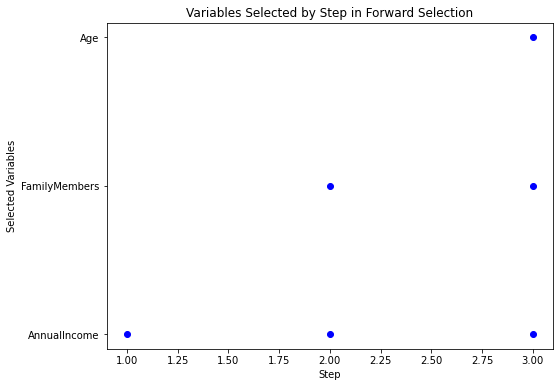

In [27]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each variable selected at each step
for i, vars in enumerate(sv_per_step):
    ax.plot([i+1]*len(vars), vars, 'bo')

# Set axis labels and title
ax.set_xlabel('Step')
ax.set_ylabel('Selected Variables')
ax.set_title('Variables Selected by Step in Forward Selection')

# Show the plot
plt.show()

In [28]:
#Forward Selection 평가
# 데이터 로드
X = df_1[selected_variables]
y = df_1['TravelInsurance']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X = sm.add_constant(X)
model = sm.Logit(y_train, X_train).fit(disp=0)
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1380
Method:                           MLE   Df Model:                            2
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                 0.06226
Time:                        22:42:55   Log-Likelihood:                -844.74
converged:                       True   LL-Null:                       -900.83
Covariance Type:            nonrobust   LLR p-value:                 4.373e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8500      0.063     13.451      0.000       0.726       0.974
x2             0.2481      0.059      4.188      0.000       0.132       0.364
x3             0.1455      0.059      2.483      0.0

In [29]:
#Forward Selection 평가

evaluate(X = df_1[selected_variables], y = df_1['TravelInsurance'])

Train) Simple Accuracy: [0.77, 0.01]
Train) Balanced Correction Rate: [0.7, 0.02]
Train) F1-Measure: [0.59, 0.03]
Train) Confusion Matrix:
: [[832  62]
 [260 229]]

Test) Simple Accuracy: [0.76, 0.03]
Test) Balanced Correction Rate: [0.7, 0.03]
Test) F1-Measure: [0.58, 0.06]
Test) Confusion Matrix:
: [[355  28]
 [122  88]]


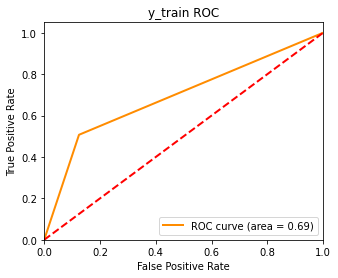

In [30]:
#Forward Selection 평가

from sklearn.metrics import roc_auc_score, roc_curve, auc

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_train ROC')
plt.legend(loc="lower right")
plt.show()

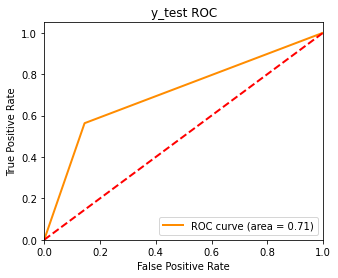

In [31]:
#Forward Selection 평가

y_test_pred = model.predict(X_test)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_test ROC')
plt.legend(loc="lower right")
plt.show()

In [32]:
# Bacward Elimination
train_times= [ ]


# load data
X = df_1.drop(columns=['TravelInsurance'], axis=1)
y = df_1['TravelInsurance']
for _ in range(100):    
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)
    
    # backward elimination
    variables = X_train.columns.tolist()  # list of descriptive variables
    sl_remove = 0.05
    selected_variables = variables  # initially select all variables
    
    auc_prev = 0  # initial auc score
    start_time = time.time()
    
    # initialize empty list to store variables selected at each step
    sv_per_step = []
    
    while True:
        X_train_const = sm.add_constant(X_train[selected_variables])
        model = sm.Logit(y_train, X_train_const).fit(disp=0)  # fit the model
        pvals = model.pvalues.drop('const')
        max_pval = pvals.max()
    
        if max_pval > sl_remove:  # remove if max p-value is greater than the criterion
            excluded_var = pvals.idxmax()
            selected_variables.remove(excluded_var)
        else:
            roc_auc = roc_auc_score(y_test, model.predict(sm.add_constant(X_test[selected_variables])))
            if roc_auc - auc_prev < 0.05:  # stopping criterion
                break
            auc_prev = roc_auc
    
        # append selected variables for current step to the list
        sv_per_step.append(selected_variables.copy())
    
    
    train_time = time.time() - start_time
    train_times.append(train_time)
print('Train) 학습에 소요된 시간:', np.mean(train_times), np.var(train_times))
print('Selected variables:', selected_variables)

Train) 학습에 소요된 시간: 0.06457754373550414 0.00014975839495420476
Selected variables: ['Age', 'AnnualIncome', 'FamilyMembers', 'FrequentFlyer', 'EverTravelledAbroad']


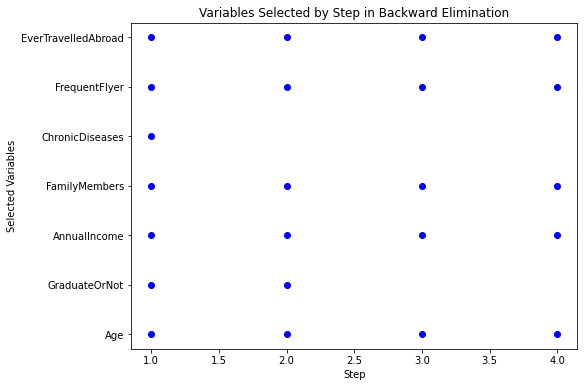

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each variable selected at each step
for i, vars in enumerate(sv_per_step):
    ax.plot([i+1]*len(vars), vars, 'bo', label=f'Step {i+1}')

# Set axis labels and title
ax.set_xlabel('Step')
ax.set_ylabel('Selected Variables')
ax.set_title('Variables Selected by Step in Backward Elimination')

plt.show()

In [34]:
# Backward Elimination 평가
# 데이터 로드
X = df_1[selected_variables]
y = df_1['TravelInsurance']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X = sm.add_constant(X)
model = sm.Logit(y_train, X_train).fit(disp=0)
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1378
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.1306
Time:                        22:43:05   Log-Likelihood:                -783.22
converged:                       True   LL-Null:                       -900.83
Covariance Type:            nonrobust   LLR p-value:                 9.875e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1888      0.062      3.050      0.002       0.067       0.310
x2             0.5229      0.071      7.332      0.000       0.383       0.663
x3             0.2750      0.062      4.467      0.0

In [35]:
# Backward Elimination 평가
evaluate(X = df_1[selected_variables], y = df_1['TravelInsurance'])

Train) Simple Accuracy: [0.77, 0.01]
Train) Balanced Correction Rate: [0.7, 0.02]
Train) F1-Measure: [0.59, 0.03]
Train) Confusion Matrix:
: [[832  62]
 [260 229]]

Test) Simple Accuracy: [0.76, 0.03]
Test) Balanced Correction Rate: [0.7, 0.03]
Test) F1-Measure: [0.58, 0.06]
Test) Confusion Matrix:
: [[355  28]
 [122  88]]


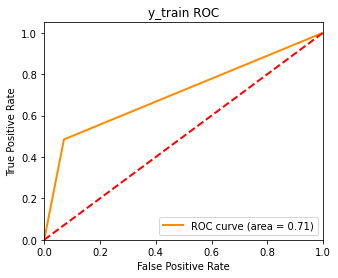

In [36]:
#Backward Elimination 평가
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_train ROC')
plt.legend(loc="lower right")
plt.show()

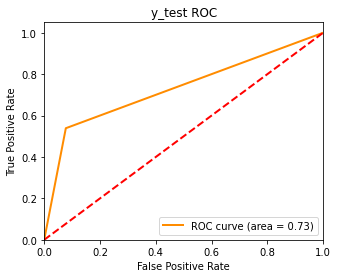

In [37]:
#Backward Elimination 평가
y_test_pred = model.predict(X_test)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_test ROC')
plt.legend(loc="lower right")
plt.show()

In [38]:
#StepWise Selection
import time
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

train_times = []

# load data
X = df_1.drop(columns=['TravelInsurance'], axis=1)
y = df_1['TravelInsurance']
for _ in range(100):   
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)
    
    # forward selection
    variables = X_train.columns.tolist()  # list of descriptive variables
    n = len(variables)  # number of variables
    
    sl_enter = 0.05
    sl_remove = 0.05
    
    selected_variables = []  # initially no variables are selected
    stepwise_variables = []  # list to store variables used by each step
    
    auc_prev = 0  # initial auc score
    start_time = time.time()
    for i in range(n):
        excluded_variables = [var for var in variables if var not in selected_variables]
        best_pval = sl_enter + 1
        while len(excluded_variables) > 0 and best_pval > sl_enter:
            X_train_const = sm.add_constant(X_train[selected_variables + excluded_variables])
            model = sm.Logit(y_train, X_train_const).fit(disp=0)
            pvals = model.pvalues.drop('const')
            best_pval = pvals.max()
            if best_pval > sl_enter:
                excluded_variables.remove(pvals.idxmax())
    
        if best_pval <= sl_enter:
            selected_variables = [var for var in pvals.index if pvals[var] < sl_enter]
            stepwise_variables.append(selected_variables.copy())
            X_test_selected = X_test[selected_variables]
            X_test_selected_const = sm.add_constant(X_test_selected)
            roc_auc = roc_auc_score(y_test, model.predict(X_test_selected_const))
    
            if roc_auc - auc_prev < 0.05:
                break
            auc_prev = roc_auc
        else:
            break
    
    train_time = time.time() - start_time
    train_times.append(train_time)
print('Train) 학습에 소요된 시간:', np.mean(train_times), np.var(train_times))
print('Selected variables:', selected_variables)

Train) 학습에 소요된 시간: 0.07863242387771606 0.00015895968778328895
Selected variables: ['Age', 'AnnualIncome', 'FamilyMembers', 'FrequentFlyer', 'EverTravelledAbroad']


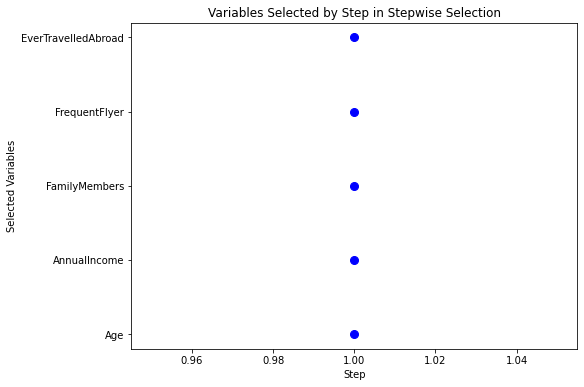

In [39]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# plot each variable selected at each step
for i, vars in enumerate(stepwise_variables):
    ax.plot([i+1]*len(vars), vars, 'bo', linewidth=2, markersize=8)

# set axis labels and title
ax.set_xlabel('Step')
ax.set_ylabel('Selected Variables')
ax.set_title('Variables Selected by Step in Stepwise Selection')

# show the plot
plt.show()

In [40]:
#StepWise Selection 평가

# 데이터 로드
X = df_1[selected_variables]
y = df_1['TravelInsurance']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X = sm.add_constant(X)
model = sm.Logit(y_train, X_train).fit(disp=0)
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1378
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.1306
Time:                        22:43:15   Log-Likelihood:                -783.22
converged:                       True   LL-Null:                       -900.83
Covariance Type:            nonrobust   LLR p-value:                 9.875e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1888      0.062      3.050      0.002       0.067       0.310
x2             0.5229      0.071      7.332      0.000       0.383       0.663
x3             0.2750      0.062      4.467      0.0

In [41]:
#StepWise Selection 평가

evaluate(X = df_1[selected_variables], y = df_1['TravelInsurance'])

Train) Simple Accuracy: [0.77, 0.01]
Train) Balanced Correction Rate: [0.7, 0.02]
Train) F1-Measure: [0.59, 0.03]
Train) Confusion Matrix:
: [[832  62]
 [260 229]]

Test) Simple Accuracy: [0.76, 0.03]
Test) Balanced Correction Rate: [0.7, 0.03]
Test) F1-Measure: [0.58, 0.06]
Test) Confusion Matrix:
: [[355  28]
 [122  88]]


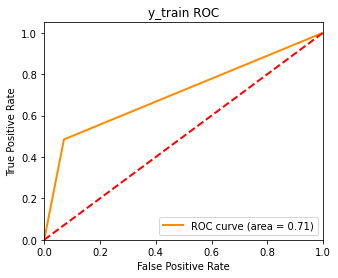

In [42]:
#StepWise Selection 평가

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_train ROC')
plt.legend(loc="lower right")
plt.show()

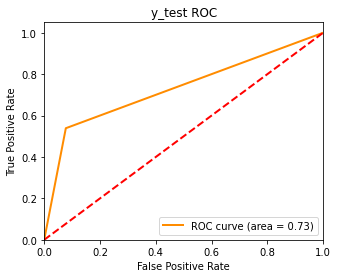

In [43]:
#StepWise Selection 평가
y_test_pred = model.predict(X_test)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_test ROC')
plt.legend(loc="lower right")
plt.show()

In [44]:
#Q9
# define the fitness function
def fitness(X, y, X_test, y_test, selected_variables):
    # load data and select variables
    X_subset = X[:, selected_variables]

    # create and fit model
    model = LogisticRegression()
    model.fit(X_subset, y)

    y_test_pred = model.predict_proba(X_test[:, selected_variables])[:, 1]
    auroc = roc_auc_score(y_test, y_test_pred)
    return auroc

def genetic_algorithm(X, y, X_test, y_test, n_population, n_generations, p_crossover, p_mutation, selection_method):
    # initialize population
    population = []
    for i in range(n_population):
        individual = np.zeros(X.shape[1], dtype=bool)
        individual[random.sample(range(X.shape[1]), k=random.randint(1, X.shape[1]))] = True
        population.append(individual)

    # evolve population over n_generations
    for generation in range(n_generations):
        # evaluate fitness of population
        fitness_scores = [fitness(X, y, X_test, y_test, individual) for individual in population]

        # select parents for crossover
        if selection_method == 'roulette':
            parents_idx = roulette(fitness_scores, n_population)
        elif selection_method == 'tournament':
            parents_idx = tournament(fitness_scores, n_population)
        elif selection_method == 'deterministic':
            parents_idx = deterministic(fitness_scores, n_population)
        else:
            raise ValueError("Invalid selection method specified")

        parents = [population[idx] for idx in parents_idx]

        # create new generation through crossover and mutation
        new_population = []
        for i in range(0, n_population, 2):
            parent1, parent2 = parents[i], parents[i+1]
            child1, child2 = parent1.copy(), parent2.copy()
            if random.random() < p_crossover:
                crossover_point = random.randint(0, X.shape[1]-1)
                child1[:crossover_point], child2[crossover_point:] = parent2[:crossover_point], parent1[crossover_point:]
            if random.random() < p_mutation:
                mutation_point = random.randint(0, X.shape[1]-1)
                child1[mutation_point] = not child1[mutation_point]
                child2[mutation_point] = not child2[mutation_point]
            new_population.extend([child1, child2])

        population = new_population

    # return best individual and fitness score
    fitness_scores = [fitness(X, y, X_test, y_test, individual) for individual in population]
    best_individual = population[np.argmax(fitness_scores)]
    best_fitness = max(fitness_scores)
    return best_individual, best_fitness

#Selection
def roulette(fitness_scores, n_parents):
    total_fitness = np.sum(fitness_scores)
    probabilities = fitness_scores / total_fitness
    parents_idx = np.random.choice(range(len(fitness_scores)), size=n_parents, p=probabilities)
    return parents_idx


def tournament(fitness_scores, n_population):
    selected_parents = []
    for i in range(n_population):
        parent1_idx, parent2_idx = random.sample(range(len(fitness_scores)), k=2)
        if fitness_scores[parent1_idx] > fitness_scores[parent2_idx]:
            selected_parents.append(parent1_idx)
        else:
            selected_parents.append(parent2_idx)
    return selected_parents

def deterministic(fitness_scores, n_population):
    sorted_idxs = np.argsort(fitness_scores)[::-1]
    return sorted_idxs[:n_population]


In [48]:
# 데이터 로드
X = df_1.drop(columns=['TravelInsurance'], axis=1) 
y = df_1['TravelInsurance']
train_times = []
print('1')

1


In [51]:
i = 0
while i <=100: 
    try: 
        # train/test 데이터 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)
        
        # 데이터 정규화
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        start_time = time.time()
        best_individual, best_fitness = genetic_algorithm(X_train, y_train, X_test, y_test, n_population=50, n_generations=20, p_crossover=0.8, p_mutation=0.1, selection_method='roulette') #'deterministic', 'roulette', 'tournament'
        train_time = time.time() - start_time
        train_times.append(train_time)
        i += 1
    except:
        pass


# print results
print('Train) 학습에 소요된 시간:', np.mean(train_times), np.var(train_times))
print(f"Best subset of variables: {df_1.drop('TravelInsurance', axis=1).columns[best_individual]}")

Train) 학습에 소요된 시간: 7.241258410225927 8.505048757517708
Best subset of variables: Index(['AnnualIncome', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


In [52]:
#GA 평가
# 데이터 로드
X = df_1[['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'ChronicDiseases', 'EverTravelledAbroad']]
y = df_1['TravelInsurance']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X = sm.add_constant(X)
model = sm.Logit(y_train, X_train).fit(disp=0)
y_test_pred = model.predict(X_test)
auroc = roc_auc_score(y_test, y_test_pred)
print(auroc)

print(model.summary())

0.7674983066154888
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.1168
Time:                        23:19:23   Log-Likelihood:                -795.61
converged:                       True   LL-Null:                       -900.83
Covariance Type:            nonrobust   LLR p-value:                 1.645e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1939      0.062      3.145      0.002       0.073       0.315
x2             0.0094      0.065      0.144      0.886      -0.118       0.137
x3            -0.0646      0.061 

In [53]:
#GA 평가
evaluate(X = df_1[['Age', 'Employment Type', 'GraduateOrNot', 'FamilyMembers', 'ChronicDiseases']], y = df_1['TravelInsurance'])


Train) Simple Accuracy: [0.77, 0.01]
Train) Balanced Correction Rate: [0.7, 0.02]
Train) F1-Measure: [0.59, 0.03]
Train) Confusion Matrix:
: [[832  62]
 [260 229]]

Test) Simple Accuracy: [0.76, 0.03]
Test) Balanced Correction Rate: [0.7, 0.03]
Test) F1-Measure: [0.58, 0.06]
Test) Confusion Matrix:
: [[355  28]
 [122  88]]


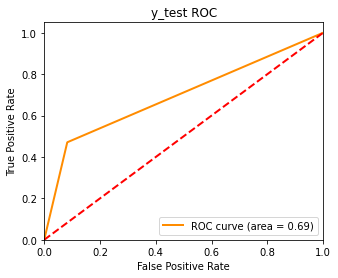

In [54]:
# GA 평가
model = LogisticRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_test ROC')
plt.legend(loc="lower right")
plt.show()

In [57]:
#Q10.
# 데이터 로드
X = df_1.drop(columns=['TravelInsurance'], axis=1) 
y = df_1['TravelInsurance']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# 보고서의 표를 참고하여 각각 대입
start_time = time.time()
best_individual, best_fitness = genetic_algorithm(X_train, y_train, X_test, y_test, n_population=100, n_generations=50, p_crossover=0.8, p_mutation=0.15, selection_method='roulette') #'deterministic', 'roulette', 'tournament'
train_time = time.time() - start_time
train_time = time.time() - start_time
print('Train) 학습에 소요된 시간:', train_time)


# print results
print(f"Best subset of variables: {df_1.drop('TravelInsurance', axis=1).columns[best_individual]}")

Train) 학습에 소요된 시간: 27.07831597328186
Best subset of variables: Index(['Age', 'GraduateOrNot', 'AnnualIncome', 'EverTravelledAbroad'], dtype='object')


In [59]:
# results 추가
evaluate(X = df_1[['Age', 'GraduateOrNot', 'AnnualIncome', 'EverTravelledAbroad']], y = df_1['TravelInsurance'])

Train) Simple Accuracy: [0.77, 0.01]
Train) Balanced Correction Rate: [0.7, 0.02]
Train) F1-Measure: [0.59, 0.03]
Train) Confusion Matrix:
: [[832  62]
 [260 229]]

Test) Simple Accuracy: [0.76, 0.03]
Test) Balanced Correction Rate: [0.7, 0.03]
Test) F1-Measure: [0.58, 0.06]
Test) Confusion Matrix:
: [[355  28]
 [122  88]]


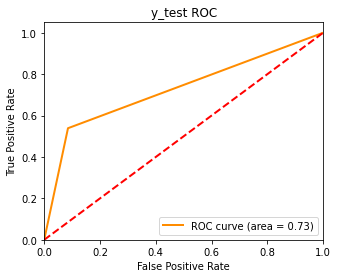

In [60]:
# 평가

model = LogisticRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# AUROC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(5, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('y_test ROC')
plt.legend(loc="lower right")
plt.show()

In [62]:
#APPENDIX
def plot_categorical_data(dataframe, column):
    """
    Plots count distribution of categorical data.
    
    Parameters:
    - dataframe: DataFrame containing the data
    - column: Name of the column containing categorical data
    """
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Countplot with default ordering
    plt.subplot(1, 2, 1)  
    ax = sns.countplot(x=column, data=dataframe, palette='Set2')  # Changing palette to 'Set2'
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # Rotate x-axis labels for better readability
    ax.bar_label(ax.containers[0])  # Add count labels on top of bars
    
    # Subplot 2: Countplot with ordering based on value counts
    plt.subplot(1, 2, 2)  
    ax = sns.countplot(x=column, data=dataframe, palette='Set2', order=dataframe[column].value_counts().index)  # Changing palette to 'Set2'
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
    ax.bar_label(ax.containers[0])  # Add count labels on top of bars
    
    plt.suptitle(f"Distribution of {column}", fontsize=16)  # Add title to the overall plot
    plt.show()

In [63]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

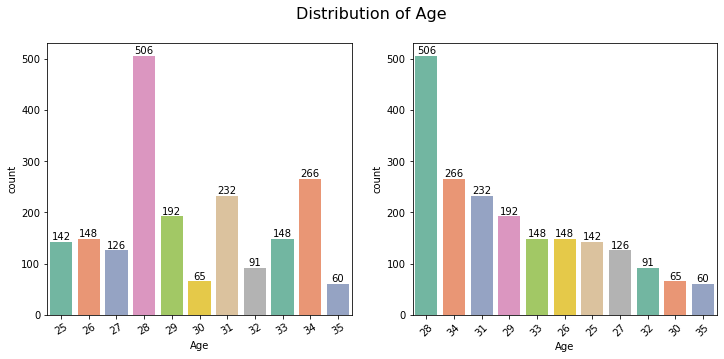

In [64]:
plot_categorical_data(df, 'Age')

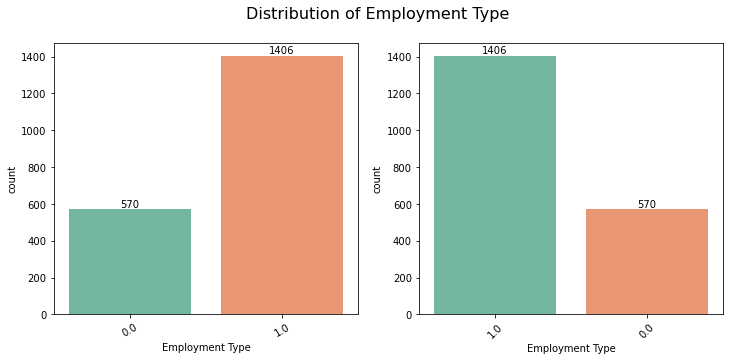

In [65]:
plot_categorical_data(df, 'Employment Type')

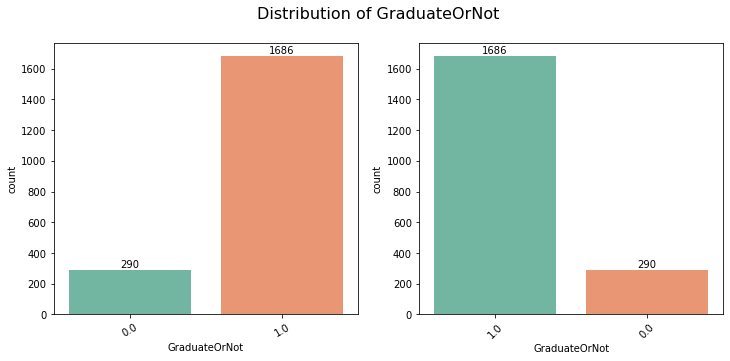

In [66]:
plot_categorical_data(df, 'GraduateOrNot')

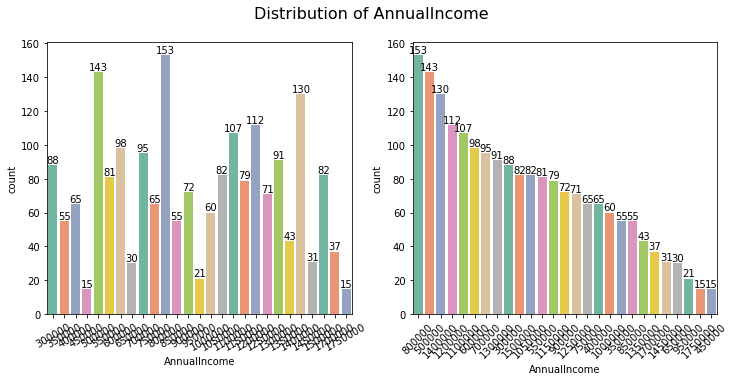

In [67]:
plot_categorical_data(df, 'AnnualIncome')

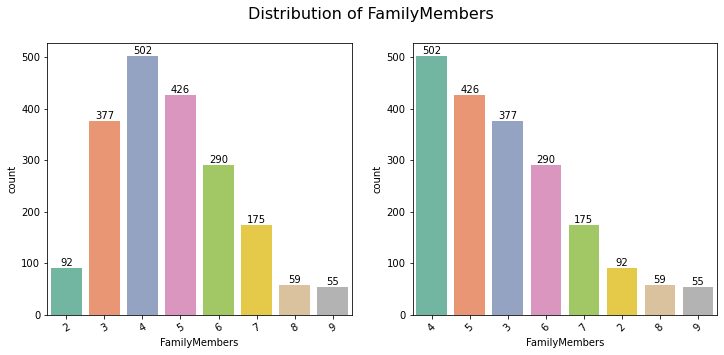

In [68]:
plot_categorical_data(df, 'FamilyMembers')

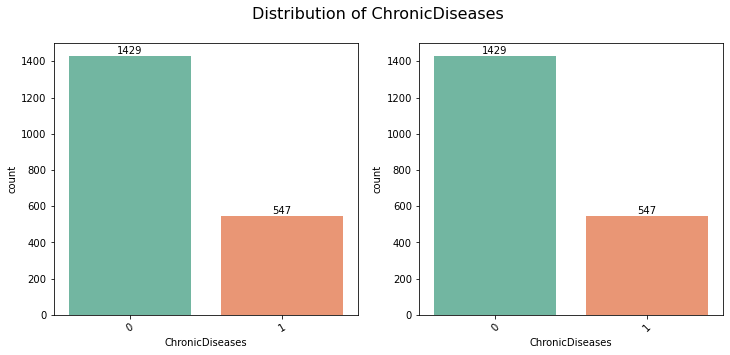

In [69]:
plot_categorical_data(df, 'ChronicDiseases')

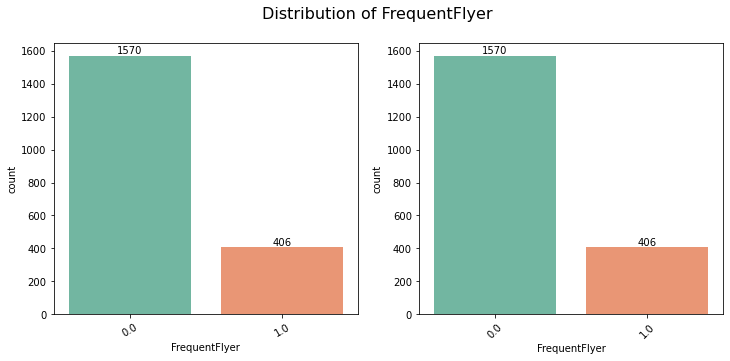

In [70]:
plot_categorical_data(df, 'FrequentFlyer')

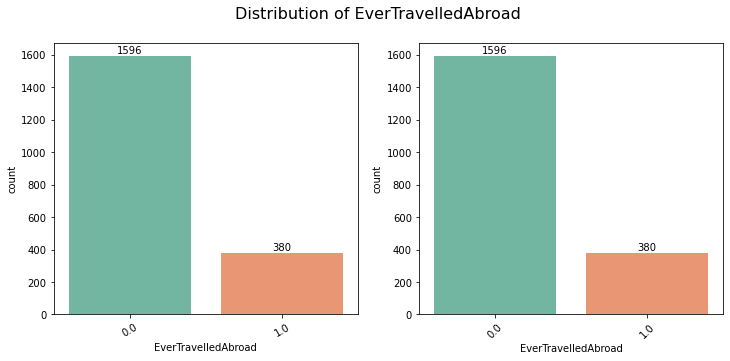

In [71]:
plot_categorical_data(df, 'EverTravelledAbroad')

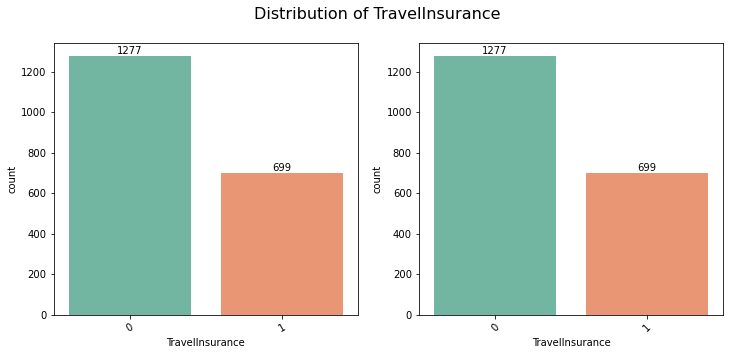

In [72]:
plot_categorical_data(df, 'TravelInsurance')